<a href="https://colab.research.google.com/github/toprakaras/DSA_210_repository/blob/main/Data_visualization_Hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

refined_data = pd.read_excel("/content/MEAN.xlsx")

In [3]:
print(refined_data.head()) #first few rows

        DATE   CARB  PROTEIN  KCAL  STEP COUNT  SLEEP DURATION (HOUR)  \
0 2025-03-28  330.0    180.0  2945        5940                   9.00   
1 2025-03-29  370.0    165.0  3270        4060                  10.00   
2 2025-03-30  460.0    200.0  3990        3350                   8.00   
3 2025-03-31  260.0    145.0  2700        6850                   7.68   
4 2025-04-01  310.0    175.0  3200        5110                   9.00   

   SLEEP EFFECTIVITY (1-10) WORKOUT INTENSITY (LOW/MEDIUM/HIGH)  \
0                      8.00                              MEDIUM   
1                      9.00                              MEDIUM   
2                      8.00                                HİGH   
3                      7.15                                REST   
4                      8.00                                REST   

   ENERGY LEVELS (1-10)  WEIGHT  
0                     7    72.0  
1                     9    72.0  
2                     8    72.2  
3                     

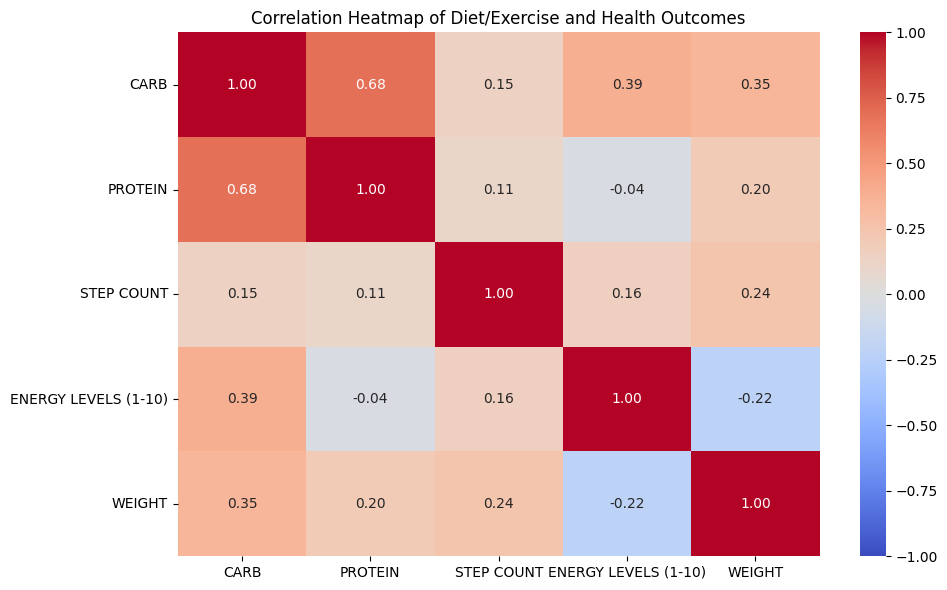

In [4]:
eda_columns = ['CARB', 'PROTEIN', 'STEP COUNT', 'ENERGY LEVELS (1-10)', 'WEIGHT']
correlation_matrix = refined_data[eda_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Heatmap of Diet/Exercise and Health Outcomes')
plt.tight_layout()
plt.show()


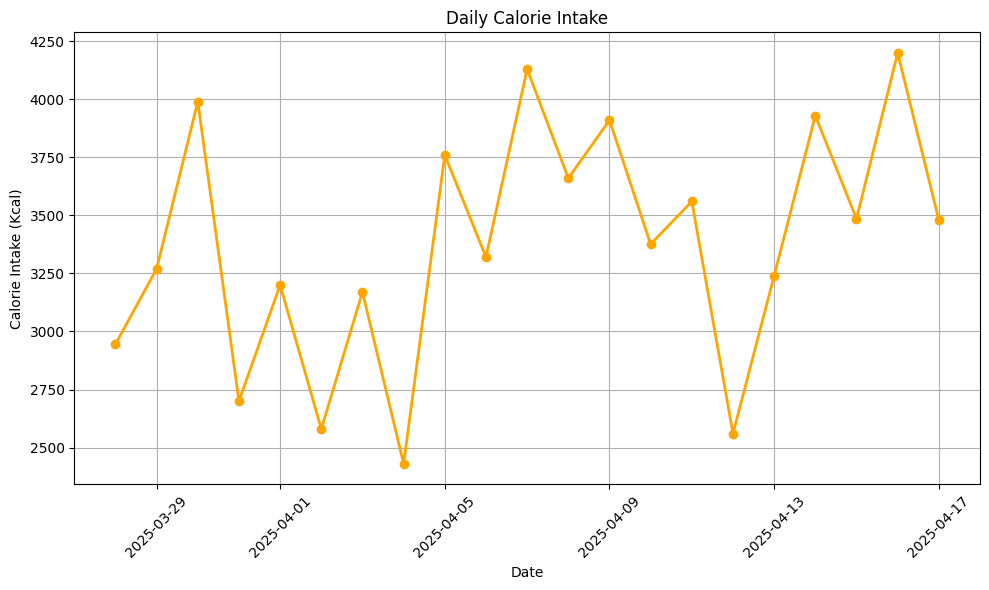

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(refined_data['DATE'], refined_data['KCAL'], marker='o', color='orange', linestyle='-', linewidth=2)
plt.title('Daily Calorie Intake')
plt.xlabel('Date')
plt.ylabel('Calorie Intake (Kcal)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


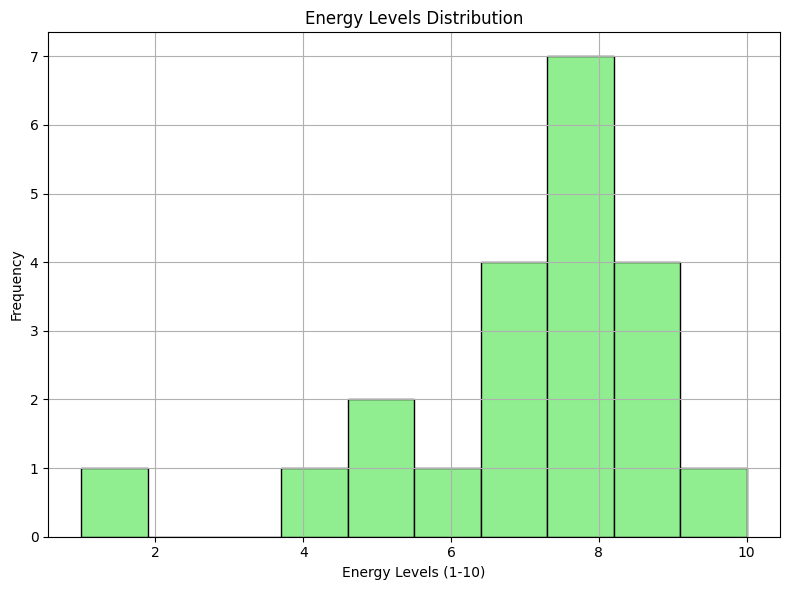

In [14]:
plt.figure(figsize=(8, 6))
plt.hist(refined_data['ENERGY LEVELS (1-10)'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Energy Levels Distribution')
plt.xlabel('Energy Levels (1-10)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

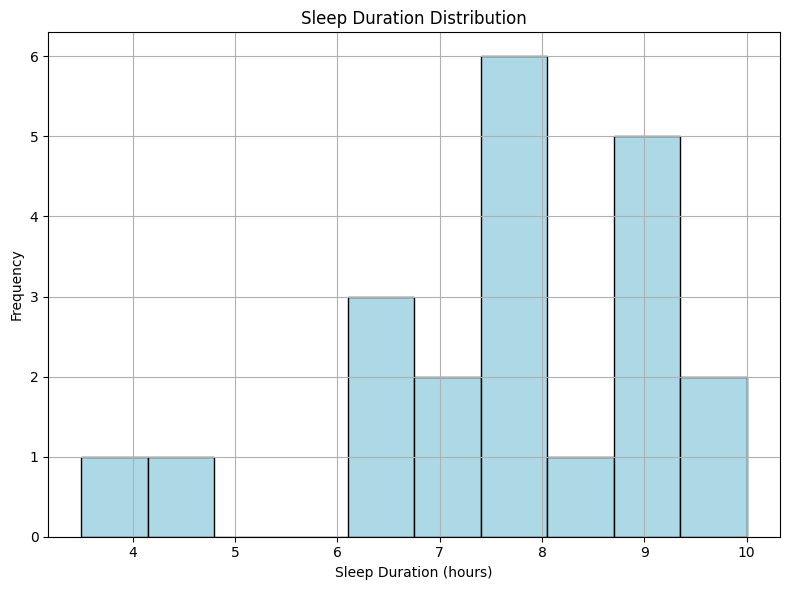

In [13]:
plt.figure(figsize=(8, 6))
plt.hist(refined_data['SLEEP DURATION (HOUR)'], bins=10, color='lightblue', edgecolor='black')
plt.title('Sleep Duration Distribution')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

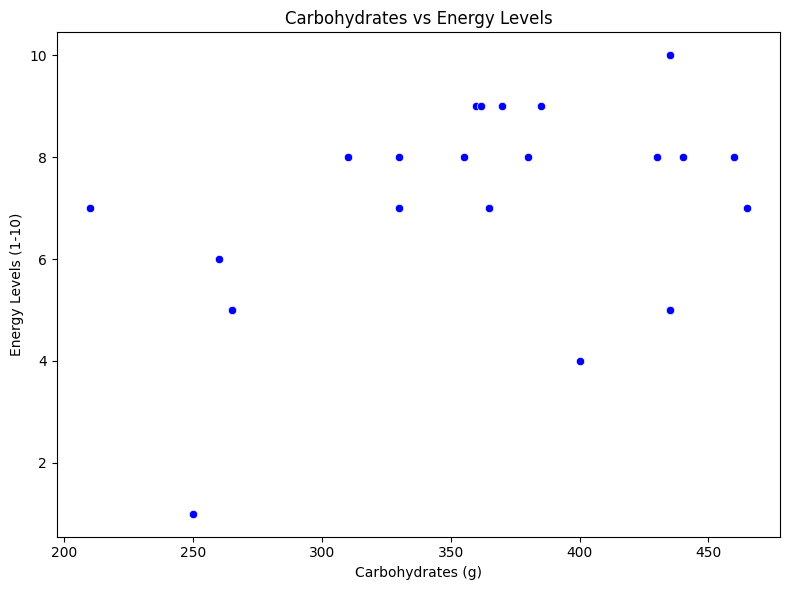

In [5]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CARB', y='ENERGY LEVELS (1-10)', data=refined_data, color='b')
plt.title('Carbohydrates vs Energy Levels')
plt.xlabel('Carbohydrates (g)')
plt.ylabel('Energy Levels (1-10)')
plt.tight_layout()
plt.show()


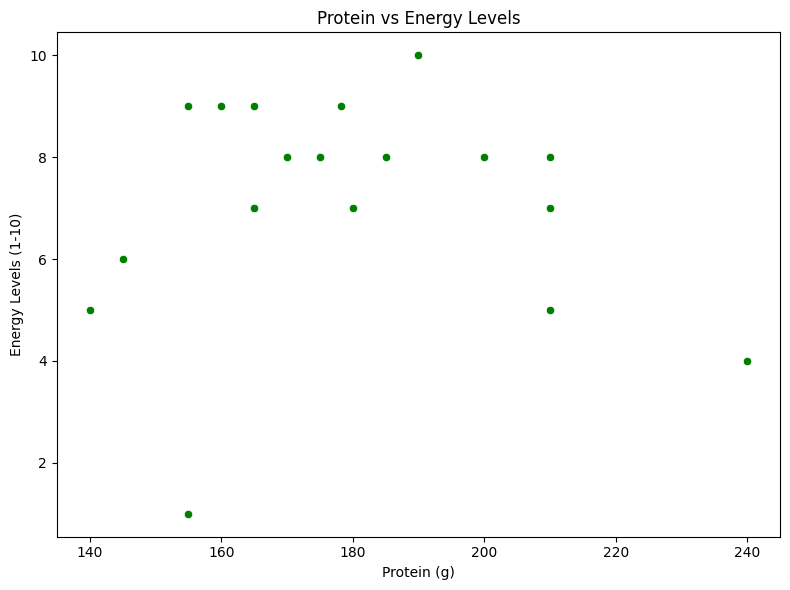

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PROTEIN', y='ENERGY LEVELS (1-10)', data=refined_data, color='g')
plt.title('Protein vs Energy Levels')
plt.xlabel('Protein (g)')
plt.ylabel('Energy Levels (1-10)')
plt.tight_layout()
plt.show()


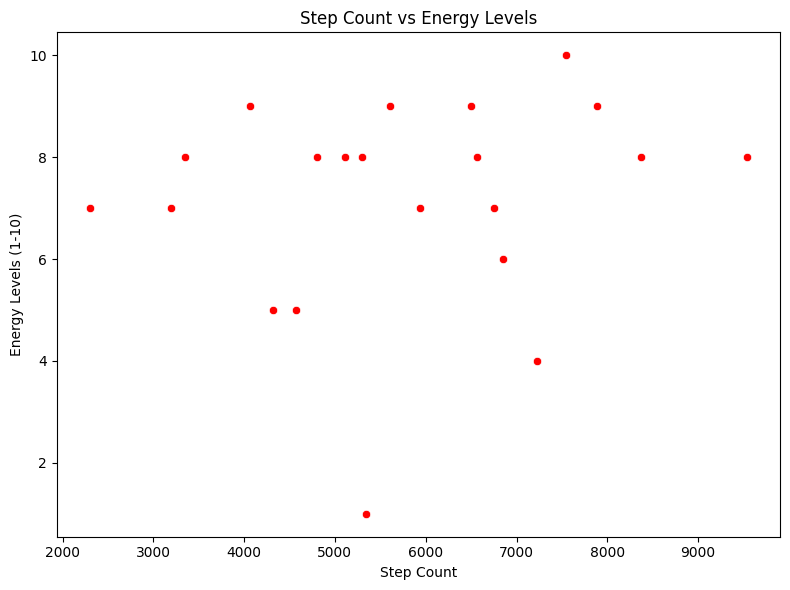

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='STEP COUNT', y='ENERGY LEVELS (1-10)', data=refined_data, color='r')
plt.title('Step Count vs Energy Levels')
plt.xlabel('Step Count')
plt.ylabel('Energy Levels (1-10)')
plt.tight_layout()
plt.show()

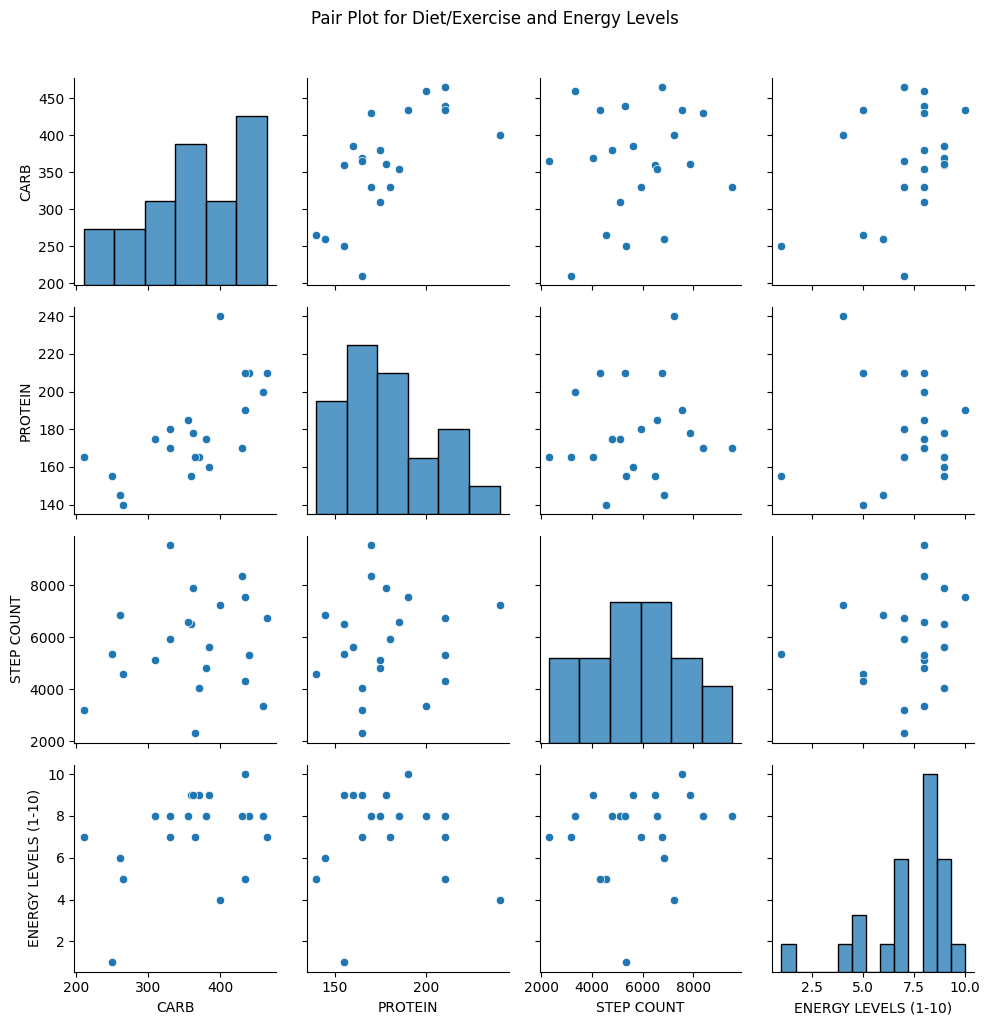

In [9]:
sns.pairplot(refined_data[['CARB', 'PROTEIN', 'STEP COUNT', 'ENERGY LEVELS (1-10)']])
plt.suptitle('Pair Plot for Diet/Exercise and Energy Levels', y=1.02)
plt.tight_layout()
plt.show()

# HYPOTHESİS TESTİNG

Null Hypothesis (H0): There is no significant relationship between diet/exercise and health outcomes.

Alternative Hypothesis (H1): Diet and exercise significantly influence BMI, weight change, and energy levels.

## Pearson's Correlation

In [16]:
from scipy.stats import pearsonr

diet_exercise_columns = ['CARB', 'PROTEIN', 'STEP COUNT']
health_outcomes_columns = ['ENERGY LEVELS (1-10)', 'WEIGHT']

#Calculate Pearson correlation
for diet_exercise in diet_exercise_columns:
    for health_outcome in health_outcomes_columns:
        correlation, p_value = pearsonr(refined_data[diet_exercise], refined_data[health_outcome])

        #Display
        print(f"Pearson Correlation between {diet_exercise} and {health_outcome}: {correlation}")
        print(f"P-value: {p_value}")

        #Interpret
        if p_value < 0.05:
            print(f"Reject the null hypothesis (H₀): There is a significant relationship between {diet_exercise} and {health_outcome}.")
        else:
            print(f"Fail to reject the null hypothesis (H₀): There is no significant relationship between {diet_exercise} and {health_outcome}.")
        print("\n")

Pearson Correlation between CARB and ENERGY LEVELS (1-10): 0.3880308518010608
P-value: 0.0821839721818061
Fail to reject the null hypothesis (H₀): There is no significant relationship between CARB and ENERGY LEVELS (1-10).


Pearson Correlation between CARB and WEIGHT: 0.35033985261610434
P-value: 0.11947695624331135
Fail to reject the null hypothesis (H₀): There is no significant relationship between CARB and WEIGHT.


Pearson Correlation between PROTEIN and ENERGY LEVELS (1-10): -0.03584612819045008
P-value: 0.8774063680687356
Fail to reject the null hypothesis (H₀): There is no significant relationship between PROTEIN and ENERGY LEVELS (1-10).


Pearson Correlation between PROTEIN and WEIGHT: 0.2019011715642942
P-value: 0.3801273250235416
Fail to reject the null hypothesis (H₀): There is no significant relationship between PROTEIN and WEIGHT.


Pearson Correlation between STEP COUNT and ENERGY LEVELS (1-10): 0.16352740619324813
P-value: 0.47877129240653143
Fail to reject the null hy